## Exploratory Data Analysis Project

The data correspond to the "Monthly average retail prices for selected products" collected by Statistics Canada

I chose to download the monthly prices between February 2020 and the latest data available which is August 2024. The objective is to see the variation of the prices in the last 4 years. 

Source :  https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=1810024501

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load a CSV File

df = pd.read_csv('1810024501_databaseLoadingData.csv')
df

,REF_DATE,GEO,DGUID,Products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2020-01,Newfoundland and Labrador,2016A000210,"Beef stewing cuts, per kilogram",Dollars,81,units,0,v1159446976,1.10,13.92,NaN,NaN,NaN,2
1,2020-02,Newfoundland and Labrador,2016A000210,"Beef stewing cuts, per kilogram",Dollars,81,units,0,v1159446976,1.10,13.14,NaN,NaN,NaN,2
2,2020-03,Newfoundland and Labrador,2016A000210,"Beef stewing cuts, per kilogram",Dollars,81,units,0,v1159446976,1.10,15.17,NaN,NaN,NaN,2
3,2020-04,Newfoundland and Labrador,2016A000210,"Beef stewing cuts, per kilogram",Dollars,81,units,0,v1159446976,1.10,14.70,NaN,NaN,NaN,2
4,2020-05,Newfoundland and Labrador,2016A000210,"Beef stewing cuts, per kilogram",Dollars,81,units,0,v1159446976,1.10,16.50,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,2024-04,British Columbia,2016A000259,"Laundry detergent, 4.43 litres",Dollars,81,units,0,v1458870250,10.11,15.45,NaN,NaN,NaN,2
61540,2024-05,British Columbia,2016A000259,"Laundry detergent, 4.43 litres",Dollars,81,units,0,v1458870250,10.11,13.67,NaN,NaN,NaN,2
61541,2024-06,British Columbia,2016A000259,"Laundry detergent, 4.43 litres",Dollars,81,units,0,v1458870250,10.11,13.61,NaN,NaN,NaN,2
61542,2024-07,British Columbia,2016A000259,"Laundry detergent, 4.43 litres",Dollars,81,units,0,v1458870250,10.11,12.86,NaN,NaN,NaN,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61544 entries, 0 to 61543
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REF_DATE       61544 non-null  object 
 1   GEO            61544 non-null  object 
 2   DGUID          61544 non-null  object 
 3   Products       61544 non-null  object 
 4   UOM            61544 non-null  object 
 5   UOM_ID         61544 non-null  int64  
 6   SCALAR_FACTOR  61544 non-null  object 
 7   SCALAR_ID      61544 non-null  int64  
 8   VECTOR         61544 non-null  object 
 9   COORDINATE     61544 non-null  float64
 10  VALUE          61544 non-null  float64
 11  STATUS         0 non-null      float64
 12  SYMBOL         0 non-null      float64
 13  TERMINATED     0 non-null      float64
 14  DECIMALS       61544 non-null  int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 7.0+ MB


In [11]:
# drop the null columns

df = df.drop(['STATUS','SYMBOL','TERMINATED'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61544 entries, 0 to 61543
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REF_DATE       61544 non-null  object 
 1   GEO            61544 non-null  object 
 2   DGUID          61544 non-null  object 
 3   Products       61544 non-null  object 
 4   UOM            61544 non-null  object 
 5   UOM_ID         61544 non-null  int64  
 6   SCALAR_FACTOR  61544 non-null  object 
 7   SCALAR_ID      61544 non-null  int64  
 8   VECTOR         61544 non-null  object 
 9   COORDINATE     61544 non-null  float64
 10  VALUE          61544 non-null  float64
 11  DECIMALS       61544 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 5.6+ MB


In [13]:
df.describe()

,UOM_ID,SCALAR_ID,COORDINATE,VALUE,DECIMALS
count,61544.0,61544.0,61544.000000,61544.000000,61544.0
mean,81.0,0.0,6.001729,5.753471,2.0
std,0.0,0.0,2.883443,5.475188,0.0
min,81.0,0.0,1.100000,0.420000,2.0
25%,81.0,0.0,3.500000,3.030000,2.0
50%,81.0,0.0,6.100000,4.210000,2.0
75%,81.0,0.0,8.500000,6.090000,2.0
max,81.0,0.0,10.990000,47.520000,2.0


In [15]:
# How many products have been analyzed ?

df['Products'].nunique()

110

In [17]:
# what are the products analysed ?

np.sort(df['Products'].unique())


array(['Almonds, 200 grams', 'Apple juice, 2 litres',
       'Apples, per kilogram', 'Avocado, unit',
       'Baby food, 128 millilitres', 'Bacon, 500 grams',
       'Bananas, per kilogram', 'Beef rib cuts, per kilogram',
       'Beef stewing cuts, per kilogram',
       'Beef striploin cuts, per kilogram',
       'Beef top sirloin cuts, per kilogram', 'Block cheese, 500 grams',
       'Broccoli, unit', 'Brown rice, 900 grams ', 'Butter, 454 grams',
       'Cabbage, per kilogram', 'Canned baked beans, 398 millilitres',
       'Canned beans and lentils, 540 millilitres',
       'Canned corn, 341 millilitres', 'Canned peach, 398 millilitres',
       'Canned pear, 398 millilitres', 'Canned salmon, 213 grams',
       'Canned soup, 284 millilitres', 'Canned tomatoes, 796 millilitres',
       'Canned tuna, 170 grams', 'Canola oil, 3 litres',
       'Cantaloupe, unit', 'Carrots, 1.36 kilograms', 'Celery, unit',
       'Cereal, 400 grams', 'Chicken breasts, per kilogram',
       'Chicken drumst

In [19]:
# Convert the 'date' column to datetime format
df['REF_DATE']=pd.to_datetime(df['REF_DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61544 entries, 0 to 61543
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   REF_DATE       61544 non-null  datetime64[ns]
 1   GEO            61544 non-null  object        
 2   DGUID          61544 non-null  object        
 3   Products       61544 non-null  object        
 4   UOM            61544 non-null  object        
 5   UOM_ID         61544 non-null  int64         
 6   SCALAR_FACTOR  61544 non-null  object        
 7   SCALAR_ID      61544 non-null  int64         
 8   VECTOR         61544 non-null  object        
 9   COORDINATE     61544 non-null  float64       
 10  VALUE          61544 non-null  float64       
 11  DECIMALS       61544 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 5.6+ MB


In [21]:
df['REF_DATE'].min()

Timestamp('2020-01-01 00:00:00')

In [23]:
df['REF_DATE'].max()

Timestamp('2024-08-01 00:00:00')

In [25]:
# Create a 'year' column
df['year'] = pd.DatetimeIndex(df['REF_DATE']).year
df

,REF_DATE,GEO,DGUID,Products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,year
0,2020-01-01,Newfoundland and Labrador,2016A000210,"Beef stewing cuts, per kilogram",Dollars,81,units,0,v1159446976,1.10,13.92,2,2020
1,2020-02-01,Newfoundland and Labrador,2016A000210,"Beef stewing cuts, per kilogram",Dollars,81,units,0,v1159446976,1.10,13.14,2,2020
2,2020-03-01,Newfoundland and Labrador,2016A000210,"Beef stewing cuts, per kilogram",Dollars,81,units,0,v1159446976,1.10,15.17,2,2020
3,2020-04-01,Newfoundland and Labrador,2016A000210,"Beef stewing cuts, per kilogram",Dollars,81,units,0,v1159446976,1.10,14.70,2,2020
4,2020-05-01,Newfoundland and Labrador,2016A000210,"Beef stewing cuts, per kilogram",Dollars,81,units,0,v1159446976,1.10,16.50,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,2024-04-01,British Columbia,2016A000259,"Laundry detergent, 4.43 litres",Dollars,81,units,0,v1458870250,10.11,15.45,2,2024
61540,2024-05-01,British Columbia,2016A000259,"Laundry detergent, 4.43 litres",Dollars,81,units,0,v1458870250,10.11,13.67,2,2024
61541,2024-06-01,British Columbia,2016A000259,"Laundry detergent, 4.43 litres",Dollars,81,units,0,v1458870250,10.11,13.61,2,2024
61542,2024-07-01,British Columbia,2016A000259,"Laundry detergent, 4.43 litres",Dollars,81,units,0,v1458870250,10.11,12.86,2,2024


In [29]:
# Find the average price per product per year

df_average_per_year = df.groupby(['Products','year','GEO'])['VALUE'].mean()
df_average_per_year=df_average_per_year.reset_index()

In [31]:
df_average_per_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495 entries, 0 to 5494
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Products  5495 non-null   object 
 1   year      5495 non-null   int32  
 2   GEO       5495 non-null   object 
 3   VALUE     5495 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 150.4+ KB


In [33]:
df_average_per_year

,Products,year,GEO,VALUE
0,"Almonds, 200 grams",2020,Alberta,5.244167
1,"Almonds, 200 grams",2020,British Columbia,5.102500
2,"Almonds, 200 grams",2020,Manitoba,5.071667
3,"Almonds, 200 grams",2020,New Brunswick,5.533333
4,"Almonds, 200 grams",2020,Newfoundland and Labrador,5.455833
...,...,...,...,...
5490,"Yogurt, 500 grams",2024,Nova Scotia,3.668750
5491,"Yogurt, 500 grams",2024,Ontario,3.351250
5492,"Yogurt, 500 grams",2024,Prince Edward Island,3.717500
5493,"Yogurt, 500 grams",2024,Quebec,3.425000


In [35]:
df_qc = df_average_per_year[df_average_per_year['GEO']=='Quebec'].pivot(index='Products', columns = 'year', values = 'VALUE')
df_qc = df_qc.transpose()
df_qc

Products,"Almonds, 200 grams","Apple juice, 2 litres","Apples, per kilogram","Avocado, unit","Baby food, 128 millilitres","Bacon, 500 grams","Bananas, per kilogram","Beef rib cuts, per kilogram","Beef stewing cuts, per kilogram","Beef striploin cuts, per kilogram",...,"Tomatoes, per kilogram","Toothpaste, 100 millilitres","Vegetable oil, 3 litres","Wheat flour, 2.5 kilograms","White bread, 675 grams","White rice, 2 kilograms","White sugar, 2 kilograms","Whole chicken, per kilogram","Wieners, 400 grams","Yogurt, 500 grams"
year,,,,,,,,,,,,,,,,,,,,,
2020,5.579167,3.268333,4.605000,1.765000,1.410000,5.782500,1.729167,26.291667,15.230833,24.774167,...,6.875000,3.014167,5.555833,4.830000,3.407500,8.577500,2.266667,5.326667,2.977500,2.760000
2021,5.554167,3.477500,4.980833,1.797500,1.406667,6.738333,1.750000,32.270000,15.455833,29.872500,...,5.248333,3.171667,7.384167,4.758333,3.434167,8.784167,2.441667,5.202500,3.288333,2.875000
2022,5.475000,3.765000,5.527500,2.167500,1.440000,7.233333,1.830833,33.433333,18.460833,32.333333,...,5.243333,3.242500,10.567500,5.425000,3.957500,10.281667,2.516667,5.435000,3.360833,3.036667
2023,5.403333,4.298333,5.733333,1.991667,1.615000,6.777500,1.830833,30.000000,17.640000,34.097500,...,5.379167,3.224167,11.065000,5.515833,4.218333,9.996667,2.899167,5.770833,3.352500,3.254167
2024,5.193750,4.123750,5.263750,2.096250,1.612500,6.416250,1.781250,33.585000,18.327500,25.087500,...,5.226250,3.485000,10.157500,5.142500,3.772500,9.653750,2.930000,6.193750,3.303750,3.425000


In [99]:
lst_produits=['Baby food, 128 millilitres',
              'Beef striploin cuts, per kilogram',
              'Block cheese, 500 grams',
              'Butter, 454 grams',
              'Canola oil, 3 litres',
              'Chicken breasts, per kilogram',
              'Dry or fresh pasta, 500 grams', 
              'Eggs, 1 dozen',
              'Laundry detergent, 4.43 litres',
              'Olive oil, 1 litre',
              'Roasted or ground coffee, 340 grams',
              'Shampoo, 400 millilitres',
              'Toothpaste, 100 millilitres',
             'Wheat flour, 2.5 kilograms', 'White bread, 675 grams',]
lst_produits

['Baby food, 128 millilitres',
 'Beef striploin cuts, per kilogram',
 'Block cheese, 500 grams',
 'Butter, 454 grams',
 'Canola oil, 3 litres',
 'Chicken breasts, per kilogram',
 'Dry or fresh pasta, 500 grams',
 'Eggs, 1 dozen',
 'Laundry detergent, 4.43 litres',
 'Olive oil, 1 litre',
 'Roasted or ground coffee, 340 grams',
 'Shampoo, 400 millilitres',
 'Toothpaste, 100 millilitres',
 'Wheat flour, 2.5 kilograms',
 'White bread, 675 grams']

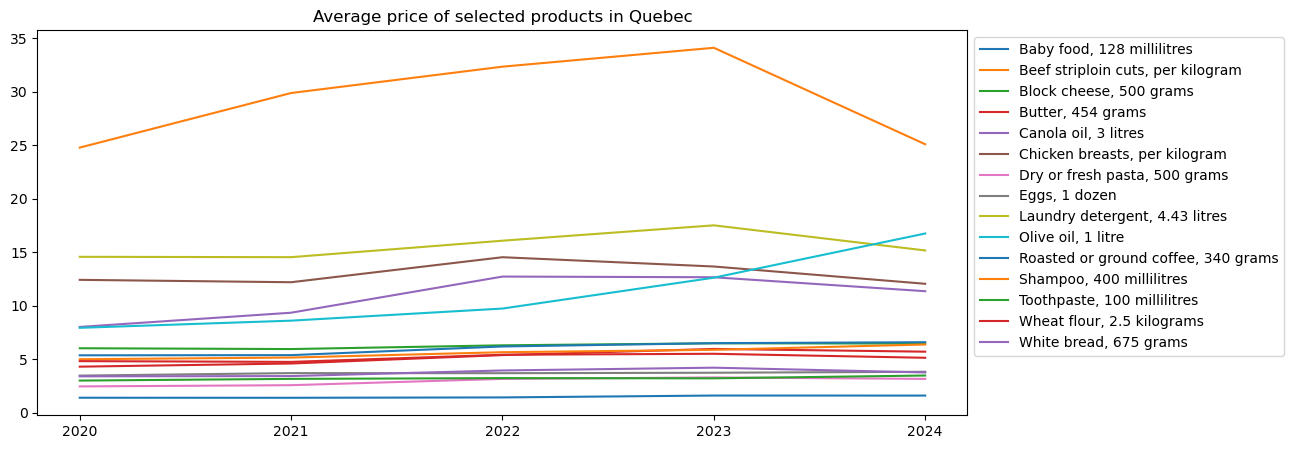

In [103]:

fig, ax = plt.subplots(figsize=(12,5))

for column in  lst_produits:
    plt.plot(df_qc.index,df_qc[column],label = column);

ax.set_xticks(np.arange(2020,2025))
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Average price of selected products in Quebec')

plt.show()

In [111]:
df_qc.describe()

Products,"Almonds, 200 grams","Apple juice, 2 litres","Apples, per kilogram","Avocado, unit","Baby food, 128 millilitres","Bacon, 500 grams","Bananas, per kilogram","Beef rib cuts, per kilogram","Beef stewing cuts, per kilogram","Beef striploin cuts, per kilogram",...,"Tomatoes, per kilogram","Toothpaste, 100 millilitres","Vegetable oil, 3 litres","Wheat flour, 2.5 kilograms","White bread, 675 grams","White rice, 2 kilograms","White sugar, 2 kilograms","Whole chicken, per kilogram","Wieners, 400 grams","Yogurt, 500 grams"
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,5.441083,3.786583,5.222083,1.963583,1.496833,6.589583,1.784417,31.116000,17.023000,29.233000,...,5.594417,3.227500,8.946000,5.134333,3.758000,9.458750,2.610833,5.585750,3.256583,3.070167
std,0.154600,0.430160,0.445922,0.178178,0.107520,0.536955,0.046250,3.054397,1.566656,4.205673,...,0.718472,0.169684,2.372747,0.340621,0.346279,0.747702,0.291950,0.400203,0.159051,0.271652
min,5.193750,3.268333,4.605000,1.765000,1.406667,5.782500,1.729167,26.291667,15.230833,24.774167,...,5.226250,3.014167,5.555833,4.758333,3.407500,8.577500,2.266667,5.202500,2.977500,2.760000
25%,5.403333,3.477500,4.980833,1.797500,1.410000,6.416250,1.750000,30.000000,15.455833,25.087500,...,5.243333,3.171667,7.384167,4.830000,3.434167,8.784167,2.441667,5.326667,3.288333,2.875000
50%,5.475000,3.765000,5.263750,1.991667,1.440000,6.738333,1.781250,32.270000,17.640000,29.872500,...,5.248333,3.224167,10.157500,5.142500,3.772500,9.653750,2.516667,5.435000,3.303750,3.036667
75%,5.554167,4.123750,5.527500,2.096250,1.612500,6.777500,1.830833,33.433333,18.327500,32.333333,...,5.379167,3.242500,10.567500,5.425000,3.957500,9.996667,2.899167,5.770833,3.352500,3.254167
max,5.579167,4.298333,5.733333,2.167500,1.615000,7.233333,1.830833,33.585000,18.460833,34.097500,...,6.875000,3.485000,11.065000,5.515833,4.218333,10.281667,2.930000,6.193750,3.360833,3.425000


In [127]:
df_qc_olive = df[(df['Products']=='Olive oil, 1 litre')& (df['GEO']=='Quebec')]
df_qc_olive.describe()


,REF_DATE,UOM_ID,SCALAR_ID,COORDINATE,VALUE,DECIMALS,year
count,56,56.0,56.0,5.600000e+01,56.000000,56.0,56.000000
mean,2022-04-16 17:08:34.285714176,81.0,0.0,5.960000e+00,10.731429,2.0,2021.857143
min,2020-01-01 00:00:00,81.0,0.0,5.960000e+00,6.530000,2.0,2020.000000
25%,2021-02-22 00:00:00,81.0,0.0,5.960000e+00,8.530000,2.0,2021.000000
50%,2022-04-16 00:00:00,81.0,0.0,5.960000e+00,9.575000,2.0,2022.000000
75%,2023-06-08 12:00:00,81.0,0.0,5.960000e+00,12.195000,2.0,2023.000000
max,2024-08-01 00:00:00,81.0,0.0,5.960000e+00,17.920000,2.0,2024.000000
std,NaN,0.0,0.0,3.584866e-15,3.135127,0.0,1.367527


In [133]:
df_qc_olive

,REF_DATE,GEO,DGUID,Products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,year
29288,2020-01-01,Quebec,2016A000224,"Olive oil, 1 litre",Dollars,81,units,0,v1458870089,5.96,8.25,2,2020
29289,2020-02-01,Quebec,2016A000224,"Olive oil, 1 litre",Dollars,81,units,0,v1458870089,5.96,8.59,2,2020
29290,2020-03-01,Quebec,2016A000224,"Olive oil, 1 litre",Dollars,81,units,0,v1458870089,5.96,8.41,2,2020
29291,2020-04-01,Quebec,2016A000224,"Olive oil, 1 litre",Dollars,81,units,0,v1458870089,5.96,8.19,2,2020
29292,2020-05-01,Quebec,2016A000224,"Olive oil, 1 litre",Dollars,81,units,0,v1458870089,5.96,7.19,2,2020
29293,2020-06-01,Quebec,2016A000224,"Olive oil, 1 litre",Dollars,81,units,0,v1458870089,5.96,8.70,2,2020
29294,2020-07-01,Quebec,2016A000224,"Olive oil, 1 litre",Dollars,81,units,0,v1458870089,5.96,6.82,2,2020
29295,2020-08-01,Quebec,2016A000224,"Olive oil, 1 litre",Dollars,81,units,0,v1458870089,5.96,8.58,2,2020
29296,2020-09-01,Quebec,2016A000224,"Olive oil, 1 litre",Dollars,81,units,0,v1458870089,5.96,8.19,2,2020
29297,2020-10-01,Quebec,2016A000224,"Olive oil, 1 litre",Dollars,81,units,0,v1458870089,5.96,8.12,2,2020


TypeError: bar() missing 1 required positional argument: 'height'

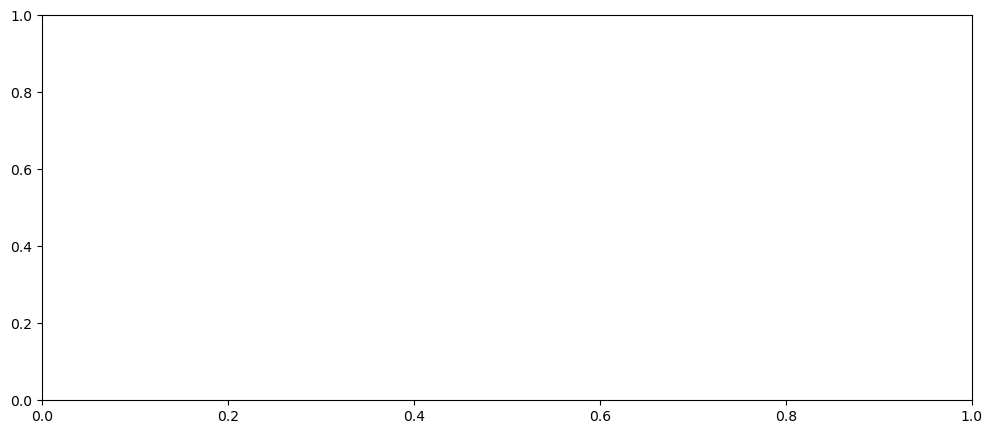

In [145]:

fig, ax = plt.subplots(figsize=(12,5))
plt.bar(x = 'REF_DATE', y = 'VALUES', data= df_qc_olive);

sns.catplot()